# Ames Housing Prices
## Exploring the Data: Overview of dataset and the target variable, SalesPrice

## Next steps: Look into hyperparemeter tuning issues for Lasso and Ridge Models, perhaps RIdge CV and LassoCV

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
# Load in the data
train_df = pd.read_csv("./house-prices-data/train.csv")
# Check number of rows and columns
train_df.shape

(1460, 81)

In [3]:
# Check the first 20 rows 
peek = train_df.head(5)
peek

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Review the columns
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# colNames_df = train_df.T[0]
# # columns_df = pd.DataFrame({'name': [colNames]})
# colNames_df.to_csv(path_or_buf = "./house-prices-data/column_notes.csv")

In [6]:
# ID column is unecessary. Let's check if there are any duplicates ids
idsUnique = len(set(train_df.Id))
idsTotal = train_df.shape[0]
idsDup = idsTotal - idsUnique

print("There are "+ str(idsDup) + " duplicate IDs for " + str(idsTotal) + " total records")

There are 0 duplicate IDs for 1460 total records


In [7]:
# We drop the ID column since it will not add any value to the modelling exercise
train_df.drop("Id", axis= 1, inplace=True)

In [8]:
# Check datatypes for columns
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [9]:
# Count the frequency of variable types in the dataframe
train_df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [10]:
# check descriptive statistics for target variable "SalePrice"
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 1)

target_description = train_df["SalePrice"].describe()
target_description

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


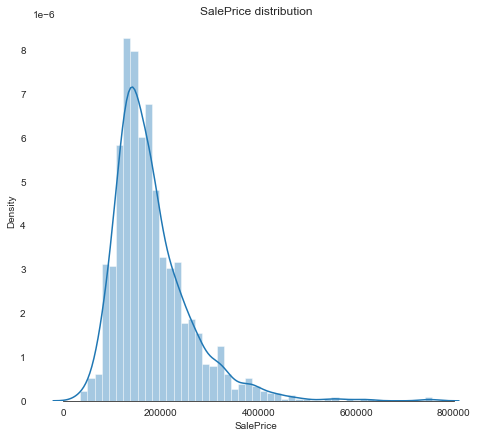

Skewness: 1.882876
Kurtosis: 6.536282


In [11]:
# histogram Saleprice

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train_df["SalePrice"]);
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

# Check for skewness and kurtosis measures
print("Skewness: %f" %train_df['SalePrice'].skew())
print("Kurtosis: %f" %train_df['SalePrice'].kurt())

# The histogram plot shows that SalePrice is not normally distributed
    # Positive Skewness Score, 1.88, indicates distribution is skewed right
    # Kurtosis score > 3 indicates a higher likelihood of outliers

### **NOTE** SalePrice distribution is skewed right. We will log transform the variable to make it have a more normal distribution. Linear models perform best when provided with normally distributed data.

In [12]:
# Log-transform sale price
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train_df['SalePrice'].describe()

count   1460.000
mean      12.024
std        0.399
min       10.460
25%       11.775
50%       12.002
75%       12.274
max       13.534
Name: SalePrice, dtype: float64

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


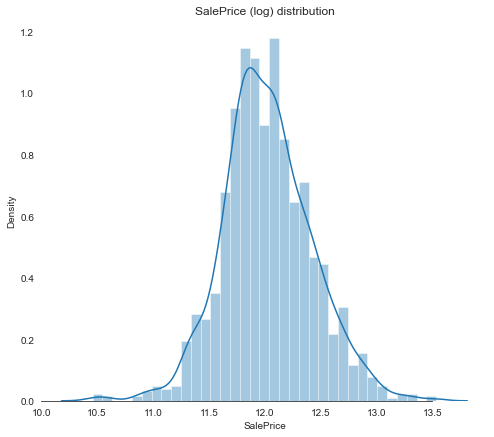

In [13]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train_df["SalePrice"]);
ax.set(title="SalePrice (log) distribution")
sns.despine(trim=True, left=True)
plt.show()

    So far, we have a high level overview of the training data and understand the basics around the dimensions of the dataset, variable types, and distribution of the target variable 'SalePrice'.



## EDA: Explanatory Variables and relationship to SalePrice

Next, we shall spend more time exploring the explanatory variables and their relationship to SalePrice.

Several common algorithms require that the input data meet certain conditions (e.g. normal distribution, no multicolinearity, no missing data) in order to function correctly. 

We will use visualizations to examine the data and understand whether any violations exist, prior to modelling.


<AxesSubplot:>

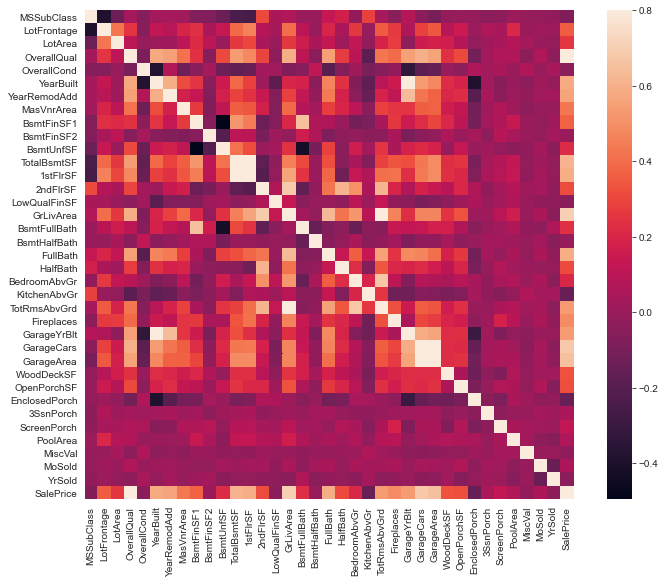

In [14]:
# Correlation matrix - observe how variables relate to each other. Highly correlated variables tend to mess with algorithms
corrmat_train = train_df.corr() #correlation matrix
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat_train, vmax =0.8, square=True)

In [15]:
# Let's view the same data as a matrix
corrmat_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.386,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,-0.066,...,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.074
LotFrontage,-0.386,1.000,0.426,0.252,-0.059,0.123,0.089,0.193,0.234,0.050,...,0.089,0.152,0.011,0.070,0.041,0.206,0.003,0.011,0.007,0.356
LotArea,-0.140,0.426,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,0.111,...,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.257
OverallQual,0.033,0.252,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,-0.059,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.817
OverallCond,-0.059,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.128,-0.046,0.040,...,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.037
YearBuilt,0.028,0.123,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,-0.049,...,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.587
YearRemodAdd,0.041,0.089,0.014,0.551,0.074,0.593,1.000,0.180,0.128,-0.068,...,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.566
MasVnrArea,0.023,0.193,0.104,0.412,-0.128,0.316,0.180,1.000,0.265,-0.072,...,0.160,0.126,-0.110,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.431
BsmtFinSF1,-0.070,0.234,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,-0.050,...,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.372
BsmtFinSF2,-0.066,0.050,0.111,-0.059,0.040,-0.049,-0.068,-0.072,-0.050,1.000,...,0.068,0.003,0.037,-0.030,0.089,0.042,0.005,-0.015,0.032,0.005


In [16]:
# Spearman's correlation coefficient is more robust to outliers than Pearson's correlation coefficient. 
# Also, The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between 
# the two variables whereas the Spearman Coefficient works with monotonic relationships as well.
corrmat_train_spearman = train_df.corr(method='spearman')
corrmat_train_spearman

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.314,-0.270,0.108,-0.072,0.036,0.007,0.025,-0.108,-0.084,...,0.023,0.032,0.011,-0.036,-0.022,0.033,-0.033,0.018,-0.027,0.007
LotFrontage,-0.314,1.000,0.650,0.255,-0.083,0.195,0.117,0.259,0.154,0.053,...,0.109,0.178,-0.096,0.064,0.044,0.085,0.024,0.026,0.003,0.409
LotArea,-0.270,0.650,1.000,0.233,-0.047,0.103,0.075,0.178,0.172,0.072,...,0.184,0.177,-0.067,0.062,0.092,0.084,0.059,0.006,-0.027,0.456
OverallQual,0.108,0.255,0.233,1.000,-0.178,0.647,0.558,0.414,0.133,-0.118,...,0.259,0.435,-0.162,0.033,0.046,0.057,-0.088,0.061,-0.025,0.810
OverallCond,-0.072,-0.083,-0.047,-0.178,1.000,-0.417,-0.041,-0.179,-0.011,0.102,...,-0.043,-0.133,0.110,0.032,0.075,-0.006,0.087,-0.007,0.050,-0.129
YearBuilt,0.036,0.195,0.103,0.647,-0.417,1.000,0.684,0.402,0.190,-0.112,...,0.288,0.393,-0.409,0.022,-0.073,0.009,-0.092,0.019,-0.014,0.653
YearRemodAdd,0.007,0.117,0.075,0.558,-0.041,0.684,1.000,0.234,0.063,-0.126,...,0.230,0.353,-0.235,0.052,-0.046,0.003,-0.091,0.021,0.045,0.571
MasVnrArea,0.025,0.259,0.178,0.414,-0.179,0.402,0.234,1.000,0.242,-0.061,...,0.174,0.209,-0.180,0.041,0.038,0.005,-0.050,0.018,0.001,0.421
BsmtFinSF1,-0.108,0.154,0.172,0.133,-0.011,0.190,0.063,0.242,1.000,0.050,...,0.179,0.081,-0.148,0.047,0.072,0.058,0.005,-0.016,0.021,0.302
BsmtFinSF2,-0.084,0.053,0.072,-0.118,0.102,-0.112,-0.126,-0.061,0.050,1.000,...,0.069,-0.069,0.042,-0.016,0.059,0.068,0.030,-0.026,0.026,-0.039


**Rule of Thumb for Interpreting the Size of a Correlation Coefficient**

Size of Correlation	Interpretation
- .90 to 1.00 (−.90 to −1.00)	Very high positive (negative) correlation
- .70 to .90 (−.70 to −.90)	High positive (negative) correlation
- .50 to .70 (−.50 to −.70)	Moderate positive (negative) correlation
- .30 to .50 (−.30 to −.50)	Low positive (negative) correlation
- .00 to .30 (.00 to −.30)	negligible correlation

Source: Hinkle DE, Wiersma W, Jurs SG. Applied Statistics for the Behavioral Sciences. 5th ed. Boston: Houghton Mifflin; 2003.

#### Summary
Very light and Very dark shaded areas denote higher colleration. Based on the charts and matrices we observe that certain variable pairs are highly correlated and potential candidates for removal/feature engineering. A few examples:
- (GarageYrBlt, YearBlt): seems intuitive that these would be the same
- (GrLivArea, TotRmsAbvGrd) : the more rooms the larger the area, generally
- (EnclosedPortch, YearBuilt)
- (BsmntUnitSF, BsmtFullBath): full baths tend to require more space
- (OverallCond, YearBuilt): 'newer' homes would be in better condition than older homes
- (LotFrontage, MSSubclass): not sure what the relationship is, but suggest certain types of dwellings have more street connected to them


### SalePrice correlations
If we focus on the SalePrice variable we observe: 
 - **high +ve corelations (> 0.7)** with: "OverallQual", "GrLivArea", "GarageCars", "YearBuilt" 
 - **moderate +ve correlations (0.5 - 0.7)** with: "GarageArea", "TotBsmtSF", "1stFlrSF", "FullBath, "TotalRmsAbvGrd", "GarageYrBlt", "YearRemodAdd", "TotRmsAbvGrd", "Fireplaces", "OpenPorchSF, "LotArea"
 

In [17]:
#Check the variables that have the highest correlation with the target variable
train_df.corrwith(train_df["SalePrice"], method='spearman').sort_values(ascending=False)

SalePrice        1.000
OverallQual      0.810
GrLivArea        0.731
GarageCars       0.691
YearBuilt        0.653
GarageArea       0.649
FullBath         0.636
TotalBsmtSF      0.603
GarageYrBlt      0.594
1stFlrSF         0.575
YearRemodAdd     0.571
TotRmsAbvGrd     0.533
Fireplaces       0.519
OpenPorchSF      0.478
LotArea          0.456
MasVnrArea       0.421
LotFrontage      0.409
WoodDeckSF       0.354
HalfBath         0.343
BsmtFinSF1       0.302
2ndFlrSF         0.294
BedroomAbvGr     0.235
BsmtFullBath     0.225
BsmtUnfSF        0.185
ScreenPorch      0.100
MoSold           0.069
3SsnPorch        0.065
PoolArea         0.058
MSSubClass       0.007
BsmtHalfBath    -0.012
YrSold          -0.030
BsmtFinSF2      -0.039
MiscVal         -0.063
LowQualFinSF    -0.068
OverallCond     -0.129
KitchenAbvGr    -0.165
EnclosedPorch   -0.218
dtype: float64

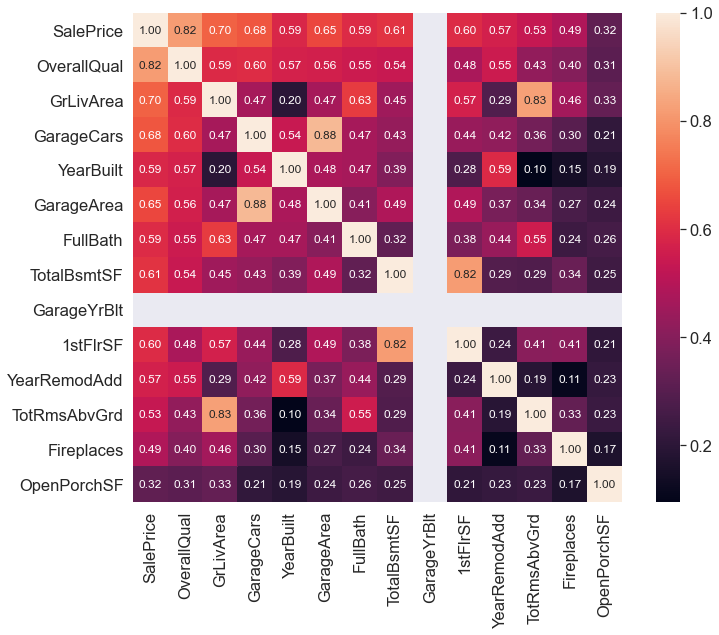

In [18]:
## Focusing on the variables that have the highest correlations with Saleprice 

# corrmat_train = train_df.corr() #correlation matrix
# f, ax = plt.subplots(figsize = (12,9))
# sns.heatmap(corrmat_train, vmax =0.8, square=True)

k = 14
cols = corrmat_train_spearman.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize = (12,9))
hm = sns.heatmap(cm, cbar = True, annot = True, square = True,
                fmt = '.2f', annot_kws = {'size':12}, 
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()


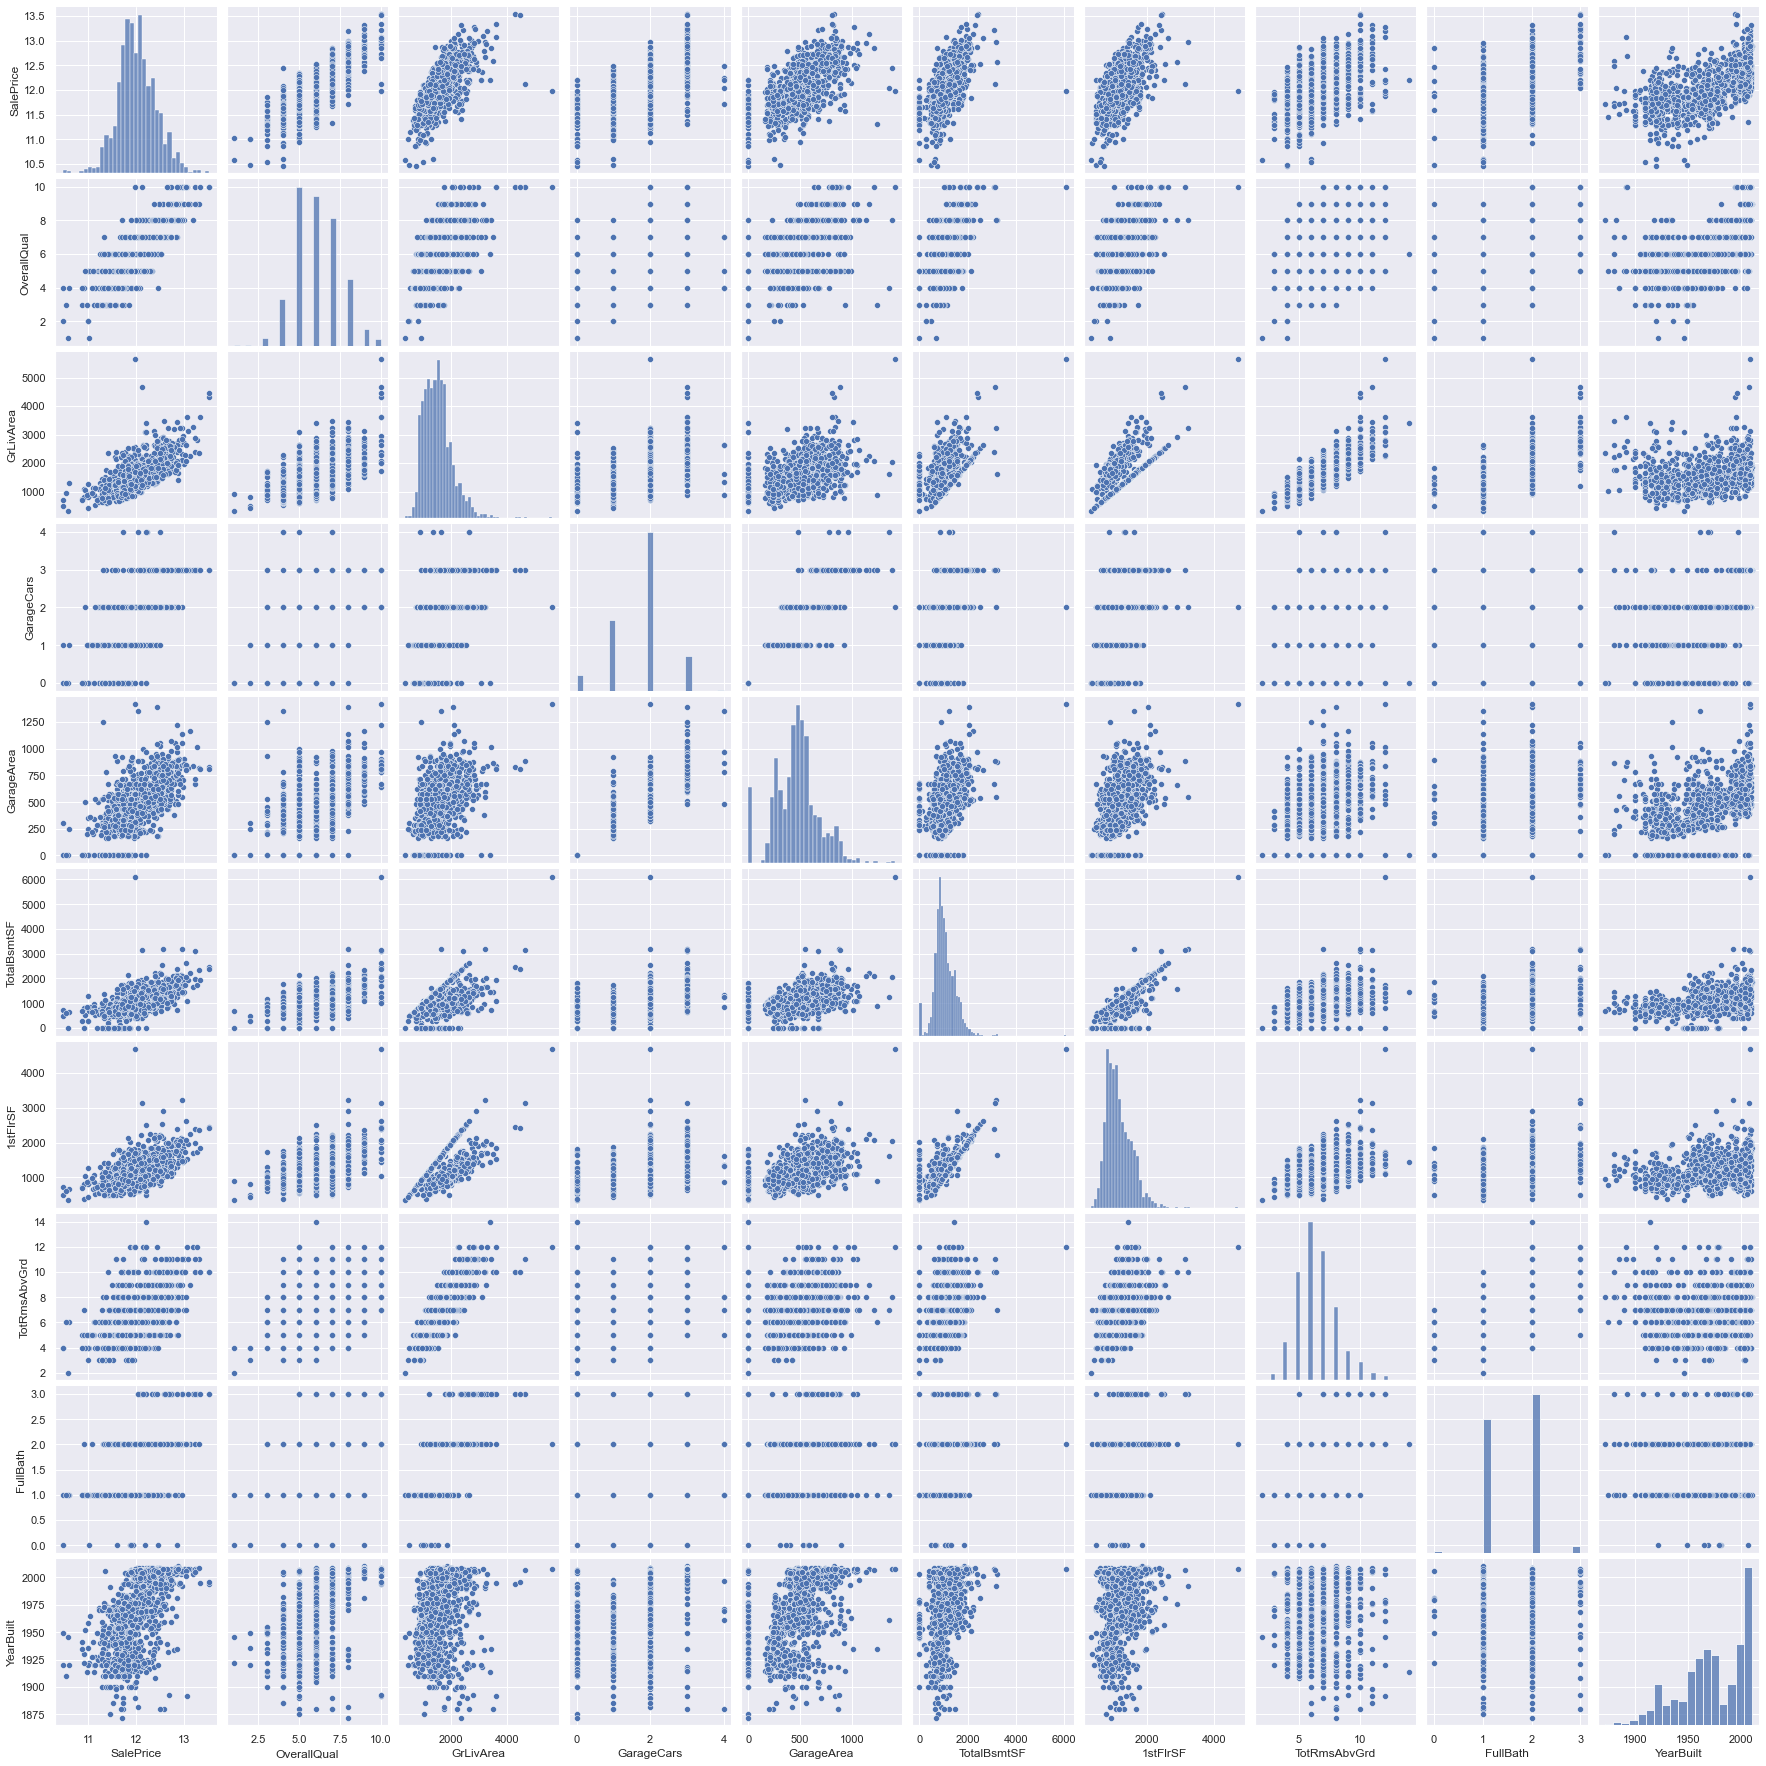

In [19]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
        'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 2.5)
plt.show();

In the chart, structured relationships (i.e. those that you can represent with a line) indicate correlation, the others suggest little to no correlation.

## Data Preparation

#### Outliers

The author of the dataset recommends removing houses with more than 4000 square feet

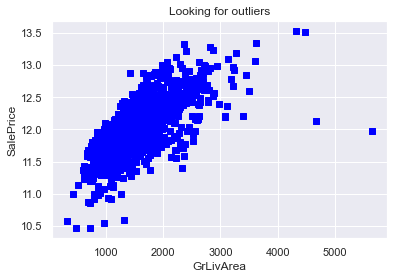

In [20]:
plt.scatter(train_df.GrLivArea, train_df.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [21]:
# Remove obs where GrLivArea is above 4000sqft
train_df = train_df[train_df.GrLivArea < 4000]

#### Checking for missing values in the dataset

Missing data can prevent certain algorithms from working (e.g. Linear Discriminant Analysis). We check the dataset to see the extent to which missing values appear in our dataframe.


In [22]:
total_missing = train_df.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing = train_df.isnull().mean().round(3) * 100
#print(percent_missing)

missing_data = pd.concat([total_missing, percent_missing], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data.head(20)

,Values.Missing,Pct.Missing
PoolQC,1451,99.700
MiscFeature,1402,96.300
Alley,1365,93.800
Fence,1176,80.800
FireplaceQu,690,47.400
LotFrontage,259,17.800
GarageType,81,5.600
GarageCond,81,5.600
GarageFinish,81,5.600
GarageQual,81,5.600


We observe that 4 variables have over 80% of the values missing. **BAD**.
Looking closer, some possible reasons:
- PoolQC: many houses do not have pools (since they are a luxury). 
- MiscFeature: according to the data dictionary, this could be "elevators, 2nd garage, sheds, tennis courts i.e. uncommon stuff. 
- Alley: over 90% of houses in the dataset do not have alley access. 
- Fence: over 80% do not have fences. 

> We will remove columns with high percent of missing values, and **exclude the columns that have 80%+ missing values.**


We also see that some columns have a small number of rows missing values e.g. Electrical, MasnVnrX, GaragX:
- MasVnrX: ditto. **Delete the rows/obs with missing values**
- Electrical: just one row missing data. **Delete**

#### Remove columns with 80%+ missing values

In [23]:
train_df = train_df.loc[ : , train_df.isnull().mean() < 0.8] # include columns that have less than 80% missing values

print("There are now", str(train_df.shape[1]), "features in the dataframe after removing columns with 80%+ missing values") 

There are now 76 features in the dataframe after removing columns with 80%+ missing values


#### As appropriate, Impute values for columns with missing values

In [24]:
# Impute Lot Frontage based on median Lot Frontage in the house's neighborhood
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### Check remaining missing values

In [25]:
total_missing2 = train_df.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing2 = train_df.isnull().mean().round(2) * 100
#percent_missing = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
#print(percent_missing)

missing_data2 = pd.concat([total_missing2, percent_missing2], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data2[missing_data2["Values.Missing"] > 0]

,Values.Missing,Pct.Missing
FireplaceQu,690,47.000
GarageCond,81,6.000
GarageType,81,6.000
GarageYrBlt,81,6.000
GarageFinish,81,6.000
GarageQual,81,6.000
BsmtExposure,38,3.000
BsmtFinType2,38,3.000
BsmtFinType1,37,3.000
BsmtCond,37,3.000


In [26]:
# Remove rows with remaining missing values
train_df = train_df.dropna(subset= ['MasVnrType','MasVnrArea', "Electrical"])

In [27]:
total_missing3 = train_df.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing3 = train_df.isnull().mean().round(2) * 100
percent_missing3 = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
#print(percent_missing)

missing_data3 = pd.concat([total_missing3, percent_missing3], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data3[missing_data3["Values.Missing"] > 1]


,Values.Missing,Pct.Missing
FireplaceQu,685,0.473
GarageCond,81,0.056
GarageType,81,0.056
GarageYrBlt,81,0.056
GarageFinish,81,0.056
GarageQual,81,0.056
BsmtExposure,38,0.026
BsmtFinType2,38,0.026
BsmtFinType1,37,0.026
BsmtCond,37,0.026


## Data Cleaning: Feature Manipulation

#### Convert numerical features to categorical

In [28]:
# Numerical features to categorical
# Convert MSubClass and month to string objects since they are a nominal categorial variable
train_df["MSSubClass"] = train_df["MSSubClass"].astype("str")

train_df = train_df.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                            7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

#### Convert categorical vars to ordinal variables and handle missing values

In [29]:
# Alley : convert to ordinal variable
# already removed --> train_df["Alley"] = train_df["Alley"].map(lambda x: 1 if x == "Grv1" else 2 if x == "Pave" else 0)


# BASEMENT VARIABLES
    #convert string vars to ordered values
    # NAs = these are places without basements
train_df["BsmtQual"] = train_df["BsmtQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["BsmtCond"] = train_df["BsmtCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["BsmtExposure"] = train_df["BsmtExposure"].map(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
train_df["BsmtFinType2"] = train_df["BsmtFinType2"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

    # handle missing numerical data e.g. square footage - replace with 0s
train_df["BsmtUnfSF"] = train_df["BsmtUnfSF"].map(lambda x: 0 if "NaN" else x)
train_df["TotalBsmtSF"] = train_df["TotalBsmtSF"].map(lambda x: 0 if "NaN" else x)
train_df["BsmtFullBath"] = train_df["BsmtFullBath"].map(lambda x: 0 if "NaN" else x)
train_df["BsmtHalfBath"] = train_df["BsmtHalfBath"].map(lambda x: 0 if "NaN" else x)

# EXTERNAL FEATURE VARIABLES: convert to ordered numbers
train_df["ExterCond"] = train_df["ExterCond"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)
train_df["ExterQual"] = train_df["ExterQual"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)

# GARAGE VARIABLES
    # convert quality and condition variables to ordered numbers
train_df["GarageQual"] = train_df["GarageQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["GarageCond"] = train_df["GarageCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

    # handle missing values in Garage Finish and Garage Type and GarageYr (likely indicate houses did not have garages)
train_df["GarageFinish"] = train_df["GarageFinish"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)
train_df["GarageType"] = train_df["GarageType"].fillna("None")
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(0)

# OTHER QUALITY VARIABLES
    # convert quality and condition to ordered numbers
train_df["HeatingQC"] = train_df["HeatingQC"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["KitchenQual"] = train_df["KitchenQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
    # NAs are likely homes without fireplaces
train_df["FireplaceQu"] = train_df["FireplaceQu"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["Functional"] = train_df["Functional"].map(lambda x: 0 if x == False else 1 if x == "Sal" else 2 if x == "Sev" else 3 if x == "Maj2" else 4 if x == "Maj1" else 5 if x == "Mod" 
                                                   else 6 if x == "Min2" else 7 if x == "Min1" else 8 if x == "Typ" else 9)

train_df  = train_df.replace({
    "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
    "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
    "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
    "Street" : {"Grvl" : 1, "Pave" : 2},
    "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})


##### Zoning -- some houses are in "commercial" zones, which are technically not meant for residential buildings. We remove these rows

In [30]:
# Check the Zoning Column and indientfy the unique values
train_df.MSZoning.unique()
train_df.MSZoning.value_counts() 

# We see that there are 10 observations in commercial zones. We exclude these from the dataset

train_df = train_df[train_df["MSZoning"]!= 'C (all)']

In [31]:
train_df.MSZoning.value_counts() 

RL    1141
RM     218
FV      62
RH      16
Name: MSZoning, dtype: int64

##### SaleCondition - Some houses are listed as "abnormal sales" i.e. trade, foreclosure etc. Remove this obs in case these are atypical

In [32]:
train_df.SaleCondition.value_counts()

train_df = train_df[train_df["SaleCondition"]!= 'Abnorml']

#### Feature Engineering, contd - consolidating features

In [33]:
# Consolidate porch variables
train_df['TotalPorchArea'] = (train_df["WoodDeckSF"] + train_df["OpenPorchSF"] + train_df["EnclosedPorch"] 
                                + train_df["3SsnPorch"] + train_df["ScreenPorch"])
# consolidate number of bathrooms
train_df['Total_Bathrooms'] = (train_df['FullBath'] 
                               + (0.5 * train_df['HalfBath']) 
                               + train_df['BsmtFullBath'] 
                               + (0.5 * train_df['BsmtHalfBath'])
                              )


# Calculate a total square footage for the home - buyers typically look at this when evaluating homes
train_df['TotalSqFeet'] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]

#### Remove other features that are unlikely to be necessary either because of low variance or overlap with other features

In [34]:
train_df = train_df.drop(columns = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch","ScreenPorch",#consolidated
                                    'FullBath','HalfBath', 'BsmtFullBath','BsmtHalfBath', #consolidated
                                    'GarageYrBlt', # captured in Year Built
                                    "MiscVal", "PoolArea", # low variance 
                                    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]) # captured in TotalBsmntSF

In [35]:
train_df.shape

(1342, 64)

In [36]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'TotalPorchArea', 'Total_Bathrooms', 'TotalSqFeet'],
      dtype='object')

In [37]:
total_missing4 = train_df.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing4 = train_df.isnull().mean().round(2) * 100
percent_missing4 = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
#print(percent_missing)

missing_data4 = pd.concat([total_missing4, percent_missing4], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data4[missing_data4["Values.Missing"] > 1]

,Values.Missing,Pct.Missing


*** Dataset no longer contains an NAs ***

## Evaluating Performance of Linear Models: Regression, Lasso and Ridge

#### Linear models in sci-kit learn only function with numerical features. We will need to identify categorical features and convert using OneHotEncoder

In [38]:
from numpy import std
from numpy import absolute
from numpy import mean
from scipy.stats import skew


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Spot-Check Algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


#### Load dataset

In [39]:
#Load dataset
house_data = train_df

# Split into feature and target
target_name = "SalePrice"
y = house_data[target_name]

# Create features  variable — all features except SalesPrice
X = house_data.drop(columns = "SalePrice", axis=1)

In [40]:
# Preprocessing - separate categorical from numerical features

categorical_features = house_data.select_dtypes(include = ["object"]).columns
numerical_features = house_data.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

train_num = house_data[numerical_features]
train_cat = house_data[categorical_features]

#Confirm that there are no missing values
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))


Numerical features : 41
Categorical features : 22
NAs for categorical features in train : 0
NAs for numerical features in train : 0


In [41]:
# Log transform skewed numerical features to reduce impact of outliers
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index # pulls index for columns that are skewed
train_num[skewed_features] = np.log1p(train_num[skewed_features]) # transforms skewed features

29 skewed numerical features to log transform


/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
skewness

LotFrontage        1.609
LotArea           12.406
Street           -18.235
LotShape          -1.286
LandSlope         -4.903
OverallCond        0.778
YearBuilt         -0.643
YearRemodAdd      -0.561
MasVnrArea         2.630
ExterQual          0.821
ExterCond          1.445
BsmtCond           2.466
BsmtExposure       1.042
BsmtFinType2       2.992
HeatingQC         -0.580
1stFlrSF           0.804
2ndFlrSF           0.759
LowQualFinSF       9.797
GrLivArea          0.811
KitchenAbvGr       4.609
TotRmsAbvGrd       0.620
Functional        -4.809
Fireplaces         0.593
FireplaceQu       -0.910
GarageQual         2.591
GarageCond         2.536
PavedDrive        -3.403
TotalPorchArea     1.105
TotalSqFeet        0.811
dtype: float64

In [43]:
skewness_log = train_num.apply(lambda x: skew(x))
skewness_log = skewness_log[abs(skewness_log)>0.5]
skewness_log

LotFrontage       -0.997
Street           -18.235
LotShape          -1.987
LandSlope         -5.518
YearBuilt         -0.671
YearRemodAdd      -0.569
ExterQual          0.580
BsmtCond           1.135
BsmtExposure       0.882
BsmtFinType2       2.608
HeatingQC         -0.816
LowQualFinSF       7.978
KitchenAbvGr       3.907
Functional        -5.382
FireplaceQu       -1.632
GarageQual         1.374
GarageCond         0.882
PavedDrive        -3.549
TotalPorchArea    -1.326
dtype: float64

In [44]:
# Create dummy features for categorical values via one-hot encoding
# train_cat = pd.get_dummies(train_cat)
# train_cat.head(5)

# ohe = OneHotEncoder(handle_unknown='ignore')
# feature_arr = ohe.fit_transform(train_cat).toarray()
# feature_labels = ohe.get_feature_names()

# feature_labels = np.array(feature_labels).ravel()
# features = pd.DataFrame(feature_arr, columns=feature_labels)

# features
#train_cat = enc.transform(train_cat).toarray()
# ohe.fit(X)
# X_ohe = ohe.transform(X).toarray()

# ohe = OneHotEncoder()
# ohe.fit(train_cat)
# train_cat = ohe.transform(train_cat).toarray()

# # check the resulting dataframe to see that each value in each category receives its own column
# ohe_df = pd.DataFrame(train_cat, columns = ohe.get_feature_names(train_cat.columns))
# ohe_df.head()


In [45]:
train_cat

,MSSubClass,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,MoSold,SaleType,SaleCondition
0,60,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Feb,WD,Normal
1,20,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,May,WD,Normal
2,60,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Sep,WD,Normal
4,60,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,Dec,WD,Normal
5,50,RL,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,...,VinylSd,None,Wood,GasA,Y,SBrkr,Attchd,Oct,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,None,PConc,GasA,Y,SBrkr,Attchd,Aug,WD,Normal
1456,20,RL,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,...,Plywood,Stone,CBlock,GasA,Y,SBrkr,Attchd,Feb,WD,Normal
1457,70,RL,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,CmentBd,None,Stone,GasA,Y,SBrkr,Attchd,May,WD,Normal
1458,20,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,...,MetalSd,None,CBlock,GasA,Y,FuseA,Attchd,Apr,WD,Normal


In [46]:
train_cat.columns

Index(['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'GarageType', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [47]:
train_num.head(5)

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,YrSold,TotalPorchArea,Total_Bathrooms,TotalSqFeet
0,4.190,9.042,1.099,1.609,4,1.386,7,1.792,7.603,7.603,...,2,2,548,1.386,1.386,1.099,2008,4.127,2.500,7.445
1,4.394,9.170,1.099,1.609,4,1.386,6,2.197,7.589,7.589,...,2,2,460,1.386,1.386,1.099,2007,5.700,2.000,7.141
2,4.234,9.328,1.099,1.386,4,1.386,7,1.792,7.602,7.602,...,2,2,608,1.386,1.386,1.099,2008,3.761,2.500,7.488
4,4.443,9.565,1.099,1.386,4,1.386,8,1.792,7.601,7.601,...,2,3,836,1.386,1.386,1.099,2008,5.624,2.500,7.696
5,4.454,9.555,1.099,1.386,4,1.386,5,1.792,7.598,7.599,...,1,2,480,1.386,1.386,1.099,2009,5.969,1.500,7.217


In [49]:
train = pd.concat([train_cat, train_num], axis = 1)
print("New number of features : " + str(train.shape[1]))



New number of features : 63


In [50]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(train)
train = ohe.transform(train).toarray()

# check the resulting dataframe to see that each value in each category receives its own column
train = pd.DataFrame(train, columns = ohe.get_feature_names(train.columns))
# train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

## Modeling

#### Linear Regression (unscaled numerical features, encoded categorical features)

In [48]:
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
train_lr1_score = lr_1.score(X_train, y_train)
test_lr1_score  = lr_1.score(X_test, y_test)

print("Linear model (basic), Train Accuracy: {:.2f}".format(train_lr1_score))
print("Linear model (basic), Test Accuracy: {:.2f}".format(test_lr1_score))

Linear model (basic), Train Accuracy: 0.95
Linear model (basic), Test Accuracy: 0.91


In [48]:
y_hat_test = lr_1.predict(X_test)
# plot y_test against y_hat
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test,
                             'Residuals': (y_hat_test - y_test), 
                             'diff%': (abs(y_hat_test - y_test)/y_test)*100}, 
                             columns=['Actual', 'Predicted','Residuals', 'diff%'])

NameError: name 'lr_1' is not defined

<AxesSubplot:xlabel='Actual'>

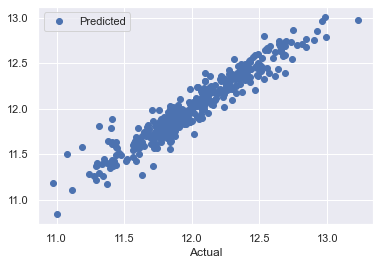

In [50]:
residuals_df.plot(x = "Actual"  , y = "Predicted" , style = "o")

<AxesSubplot:xlabel='Predicted'>

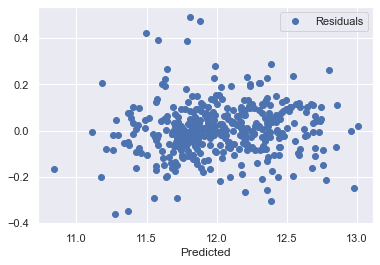

In [51]:
residuals_df.plot(x = "Predicted", y = "Residuals", style = "o")

In [52]:
lr1_coef_df = pd.DataFrame(lr_1.coef_, X_train.columns, columns=['Coefficient'])
#coeff_df[coeff_df['Coefficient']]
sorted_lr1_coef = np.abs(lr1_coef_df).sort_values(by = ['Coefficient'],ascending=False)
sorted_lr1_coef
sorted_lr1_coef.head(10)

,Coefficient
YearBuilt,4.053
MSSubClass_45,0.276
OverallCond,0.267
RoofMatl_WdShngl,0.267
HouseStyle_1.5Unf,0.258
HouseStyle_2.5Unf,0.242
MSSubClass_75,0.218
SaleCondition_AdjLand,0.210
Functional,0.206
SaleType_New,0.204


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
print("Test MSE: {}".format(test_rmse))
# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat_test)
test_mae
print("Test MAE: {}".format(test_mae))



Test MSE: 0.11298408083680919
Test MAE: 0.08226960254323079


##### Model accuracy is 95% for the train set, and 91% for the test set. Suggests some model overfitting. 
##### Will try lasso and ridge regularization to compare model accuracy

### Ridge Regularization

In [54]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

#### Simple ridge model with alpha = 1

In [55]:
ridge.set_params(alpha=1.0)
ridge.fit(X_train, y_train)
train_ridge_score = ridge.score(X_train, y_train)
test_ridge_score =ridge.score(X_test, y_test)

print("Ridge model, Train Accuracy: {:.2f}".format(train_ridge_score))
print("Ridge model, Test Accuracy: {:.2f}".format(test_ridge_score))

Ridge model, Train Accuracy: 0.94
Ridge model, Test Accuracy: 0.92


##### Ridge model with alpha =1 has lower train accuracy (94%) than basic linear model. But test accuracy is higher than basic linear model (92%). 


#### Ridge model, tuning alpha

Text(0, 0.5, 'slope values')

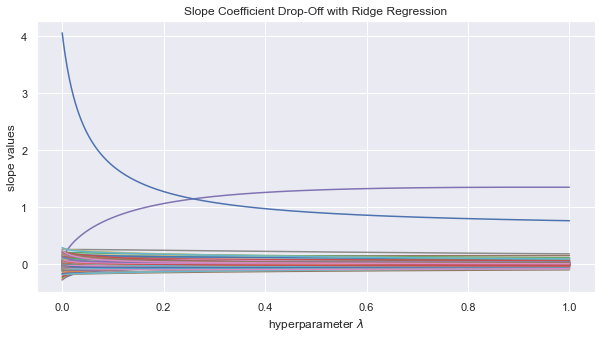

In [56]:
train_r2 = []
test_r2  = []
coefs = []
alphaRange = np.linspace(.00001, 1, 1000)

for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=True)  
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    train_r2.append(ridge.score(X_train, y_train))
    test_r2.append(ridge.score(X_test, y_test))
coefs = pd.DataFrame(coefs, index = alphaRange, columns = X_train.columns)

# Plot change in coefficients with different values of alpha
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
plt.title(r'Slope Coefficient Drop-Off with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

In [57]:
alphaRange[np.array(test_r2) == max(test_r2)] # index value of alpha that corresponds with highest test r2 index

array([0.16917748])

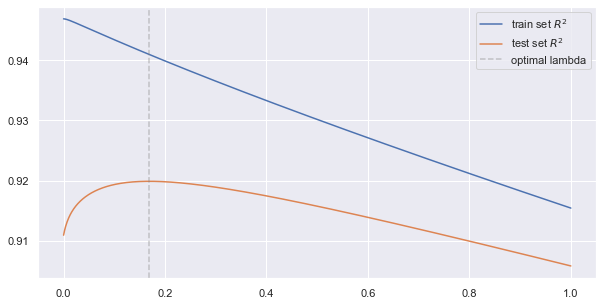

In [58]:
plt.plot(alphaRange, train_r2, label=r'train set $R^2$')
plt.plot(alphaRange, test_r2, label=r'test set $R^2$')
highest_test_alpha = alphaRange[np.array(test_r2) == max(test_r2)]
plt.axvline(highest_test_alpha, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)

The Ridge (best alpha) train score is: 0.94
The Ridge (best alpha) test score is: 0.92 
Ridge picked 212 features and eliminated the other 9 features


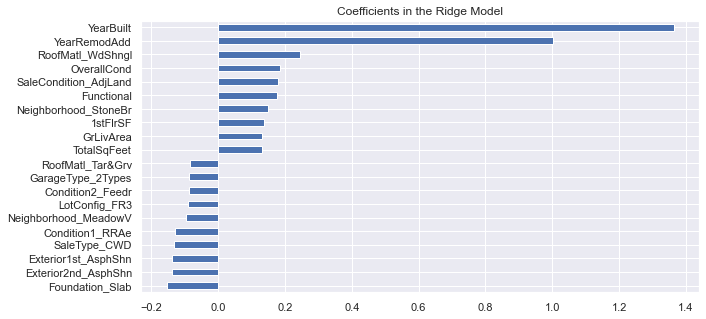

In [59]:
ridge.set_params(normalize=True, alpha=highest_test_alpha)
ridge.fit(X_train, y_train)
print("The Ridge (best alpha) train score is: {:.2f}".format(ridge.score(X_train, y_train)))
print("The Ridge (best alpha) test score is: {:.2f} ".format(ridge.score(X_test, y_test)))

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " + 
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


#### Lasso Regularization

##### Lasso, tuning alpha

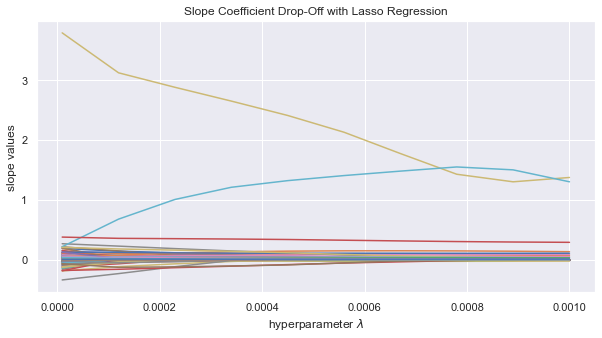

Lasso picked 15 features and eliminated the other 206 features


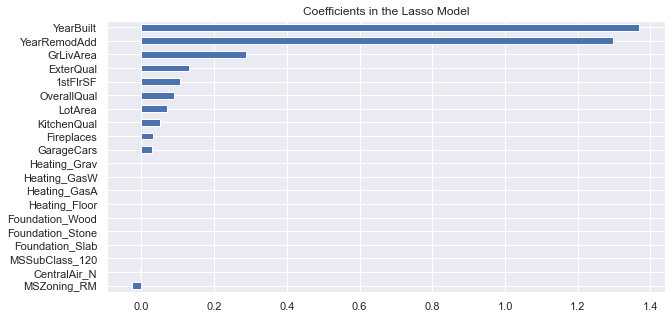

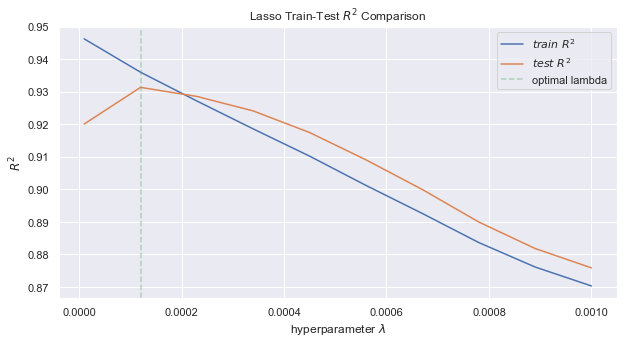

In [60]:
train_r2_lasso = []
test_r2_lasso  = []
coefs_lasso = []
alphaRange = np.linspace(0.00001, 0.001, 10)

for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True)  
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_r2_lasso.append(lasso.score(X_train, y_train))
    test_r2_lasso.append(lasso.score(X_test, y_test))
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphaRange, columns = X_train.columns)

# Plot change in coefficients with different values of alpha
plt.rcParams['figure.figsize'] = (10,5)

for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.title(r'Slope Coefficient Drop-Off with Lasso Regression')
plt.show()

# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " + 
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()



# Plot R2 for different alphas
lasso_scores_train = np.array(train_r2_lasso) 
lasso_scores_test  = np.array(test_r2_lasso)

plt.plot(alphaRange, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphaRange, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphaRange[lasso_underfit])
lasso_overfit = alphaRange[lasso_scores_test < lasso_scores_train]
last_overfit = max(lasso_overfit)
#last_underfit  = np.max(alphaRange[lasso_underfit])

#highest_test_alpha = alphaRange[lasso_scores_test == max(lasso_scores_test)]


plt.axvline(last_overfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.show()

# for name in coefs_lasso.iloc[0, :].sort_values().index:
#     plt.plot(coefs.index, coefs_lasso[name], label=name)
# # plt.legend(loc=4)   
# plt.title(r'Slope Coefficient Drop-Off with Lasso Regression')
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')

In [61]:
coefs.sort_values(ascending=False).head(20)

YearBuilt            1.370
YearRemodAdd         1.298
GrLivArea            0.288
ExterQual            0.132
1stFlrSF             0.106
OverallQual          0.088
LotArea              0.070
KitchenQual          0.051
Fireplaces           0.030
GarageCars           0.030
TotalSqFeet          0.009
BsmtFinType1         0.004
GarageArea           0.000
Condition2_Norm      0.000
HouseStyle_1.5Fin   -0.000
BldgType_TwnhsE     -0.000
BldgType_Twnhs      -0.000
BldgType_Duplex     -0.000
BldgType_2fmCon     -0.000
BldgType_1Fam        0.000
dtype: float64

In [ ]:
coefs.sort_values(ascending=False).tail(20)

In [62]:
lasso.set_params(alpha = last_overfit, normalize = True)
lasso.fit(X_train, y_train)
print("The Lasso model (best alpha = {}) train score is: {:.2f}".format(last_overfit,lasso.score(X_train, y_train)))
print("The Lasso model (best alpha = {}) test score is: {:.2f} ".format(last_overfit,lasso.score(X_test, y_test)))

The Lasso model (best alpha = 0.00012) train score is: 0.94
The Lasso model (best alpha = 0.00012) test score is: 0.93 


In [ ]:
last_overfit

In [ ]:
# Example from KAGGLE

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import make_scorer


scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)


# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " + 
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


## Evaluating Performance of Non-Linear Models: Decision Trees and Random Forest

Decision Trees and Random Forest are useful predictive modelling algorithms. They have several advantages that we can take advantage of:
- Can be used for regression and classification problems 
- Work well with categorical and numeric data
- Data does not need to be rescaled
- Can handle missing values
- Handles non-linear inputs
- Robust to outliers
- In the case of DTs - easy to interpret. Random Forests are a bit more complex

Decision trees are prone to overfitting. Random Forests addresses this by averaging the results (bagging/ensembling) of several decision trees, thus **1)** lowering the risk of overfitting and also **2)** reducing the model variance .

In [ ]:
# load libraries
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder


***We will treat the train set as our MAIN dataset, and split it into train-test for model validation***

In [ ]:
#Load dataset
house_data = train_df

# Split into feature and target
target_name = "SalePrice"
y = house_data[target_name]

# Create features  variable — all features except SalesPrice
X = house_data.drop(columns = "SalePrice", axis=1)

    Note that the one hot encoder blows up the number of features to 6109 - definitely expect severe overfitting

## Decision Tree Model
### All columns

In [ ]:
# # Use OneHotEnocoder to convert categorical features in X into one-hot arrays (scikit-learn DTs do not support categorical feats)
# ohe = OneHotEncoder()
# ohe.fit(X)
# X_ohe = ohe.transform(X).toarray()

# # check the resulting dataframe to see that each value in each category receives its own column
# ohe_df = pd.DataFrame(X_ohe, columns = ohe.get_feature_names(X.columns))
# ohe_df.head()

# # Split into train-test set
# train_X, test_X, train_y, test_y = train_test_split(X_ohe, y, random_state = 7)

In [ ]:
y_train.dtype

In [ ]:
# Define a decision tree model
tree_model = tree.DecisionTreeRegressor()

tree_model.fit(X_train, y_train)
tree_model_predictions = tree_model.predict(X_test)

# Check the error
train_error = (1 - tree_model.score(X_train, y_train))
test_error = (1 - tree_model.score(X_test, y_test))
    # check MAE
tree_test_mae = mean_absolute_error(tree_model_predictions, y_test)

print("Training Accuracy: {:,.05f}".format(tree_model.score(X_train, y_train)))
print("Training Error: {:,.05f}".format(train_error))
print("Test Accuracy: {:,.05f}".format(tree_model.score(X_train, y_train)))
print("Test Error is: {:,.05f}".format(test_error))
print("Validation MAE for Decision Tree Model: {:,.0f}".format(tree_test_mae))

# Training Accuracy: 0.98529
# Training Error: 0.01471
# Test Accuracy: 0.00000
# Test Error is: 1.00000
# Validation MAE for Decision Tree Model: 31,10

#### As expected, single decision tree has AWFUL performance


### Decision Tree with a subset of features that have highest correlation with SalePrice


In [ ]:
# Prepare the training and test sets

# object 'cols' is a list of the features that have highest correlation with SalePrice
# Filter these features out of X for use in the Decision Tree
topCorr_SalePrice = corrmat_train_spearman.nlargest(10, 'SalePrice')['SalePrice'].index
features = list(topCorr_SalePrice.values)
features.remove('SalePrice')
X_corr = X[features]

# Split into train-test set
train_X, test_X, train_y, test_y = train_test_split(X_corr, y, random_state = 7)

In [ ]:

# Define a decision tree model
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(train_X, train_y)
tree_model_predictions = tree_model.predict(test_X)

# Check the error
train_error = (1 - tree_model.score(train_X, train_y))
test_error = (1 - tree_model.score(test_X, test_y))
    # check MAE
tree_test_mae = mean_absolute_error(tree_model_predictions, test_y)

print("Training Accuracy: {:,.05f}".format(tree_model.score(train_X, train_y)))
print("Training Error: {:,.05f}".format(train_error))
print("Test Accuracy: {:,.05f}".format(tree_model.score(test_X, test_y)))
print("Test Error is: {:,.05f}".format(test_error))
print("Validation MAE for Decision Tree Model: {:,.0f}".format(tree_test_mae))


# Training Accuracy: 0.98529
# Training Error: 0.01471
# Test Accuracy: 0.00551
# Test Error is: 0.99449
# Validation MAE for Decision Tree Model: 29,965

    Lots of overfitting still happening. Let's try to tune the parameters of the Decision Tree (tree depth etc) to try get a better result

### Use Grid Search to find best parameters for Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_para_tree = [{
    "criterion": ["gini", "entropy"],
    'max_depth': np.linspace(start=10, stop=110, num=11, dtype=int),
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=108)
grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy', n_jobs=-1)
%time grid_search_tree.fit(train_X, train_y)


In [ ]:
grid_search_tree.best_params_
# {'criterion': 'gini',
#  'max_depth': 20,
#  'min_samples_leaf': 4,
#  'min_samples_split': 22}


In [ ]:
grid_search_tree.best_score_

In [ ]:
grid_search_tree.score(train_X, train_y)

In [ ]:
grid_search_tree.score(test_X, test_y)

In [ ]:
# Implementing the model with the best parameters identified during grid search

# Define a decision tree model
best_tree_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth = 20, 
                                         min_samples_leaf= 4, min_samples_split = 22, random_state= 1)
best_tree_model.fit(train_X, train_y)
best_tree_model_predictions = tree_model.predict(test_X)

# Check the error
train_error = (1 - best_tree_model.score(train_X, train_y))
test_error = (1 - best_tree_model.score(test_X, test_y))
    # check MAE
best_tree_test_mae = mean_absolute_error(best_tree_model_predictions, test_y)

print("Training Accuracy: {:,.05f}".format(best_tree_model.score(train_X, train_y)))
print("Training Error: {:,.05f}".format(train_error))
print("Test Accuracy: {:,.05f}".format(best_tree_model.score(test_X, test_y)))
print("Test Error is: {:,.05f}".format(test_error))
print("Validation MAE for Decision Tree Model: {:,.0f}".format(best_tree_test_mae))

# Training Accuracy: 0.18015
# Training Error: 0.81985
# Test Accuracy: 0.00826
# Test Error is: 0.99174
# Validation MAE for Decision Tree Model: 40,863

### Accuracy for Decision Tree improved on test set when using parameters identified during grid search but still quite BAD ( just over 1%). Next, we will use Random Forest Model to see if we can improve the predictive accuracy.

## Random Forest

### Top correlated columns

In [ ]:
# Prepare the training and test sets
topCorr_SalePrice = corrmat_train_spearman.nlargest(10, 'SalePrice')['SalePrice'].index
features = list(topCorr_SalePrice.values)
features.remove('SalePrice')
X_corr = X[features]

# Split into train-test set
train_X, test_X, train_y, test_y = train_test_split(X_corr, y, random_state = 7)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state =1)
rf_model.fit(train_X, train_y)
rf_model_predictions = rf_model.predict(test_X)

# Check the error
train_error = (1 - rf_model.score(train_X, train_y))
test_error = (1 - rf_model.score(test_X, test_y))
    # check MAE
rf_model_test_mae = mean_absolute_error(rf_model_predictions, test_y)

print("Training Accuracy: {:,.05f}".format(rf_model.score(train_X, train_y)))
print("Training Error: {:,.05f}".format(train_error))
print("Test Accuracy: {:,.05f}".format(rf_model.score(test_X, test_y)))
print("Test Error is: {:,.05f}".format(test_error))
print("Validation MAE for Decision Tree Model: {:,.0f}".format(rf_model_test_mae))

# Training Accuracy: 0.97161
# Training Error: 0.02839
# Test Accuracy: 0.85388
# Test Error is: 0.14612
# Validation MAE for Decision Tree Model: 19,725

#### Accuracy rate has increased significanty with the Random Forest model. Test Accuracy is now approx. 86%. There is still overfitting, since Train Accuracy is greater than Test Accuracy,  but much lower than it was for the Decision Tree.

***Next we try using gridsearch to tune the Random Forest hyperparameters***

In [ ]:
grid_para_forest = [{
    "n_estimators": [25, 50, 100],
    'max_depth': np.linspace(start=10, stop=110, num=5, dtype=int),
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(rf_model, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(train_X, train_y)

In [ ]:
grid_search_forest.best_params_
# {'max_depth': 10,
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 100,
#  'random_state': 42}

In [ ]:
grid_search_forest.best_score_

In [ ]:
grid_search_forest.score(train_X, train_y)

In [ ]:
grid_search_forest.score(test_X, test_y)

In [ ]:
# implement model using parameters from grid search
# Define a decision tree model
best_rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf= 2, min_samples_split= 2, n_estimators = 100,random_state =1)
best_rf_model.fit(train_X, train_y)
best_rf_model_predictions = best_rf_model.predict(test_X)

# Check the error
train_error = (1 - best_rf_model.score(train_X, train_y))
test_error = (1 - best_rf_model.score(test_X, test_y))
    # check MAE
best_rf_model_test_mae = mean_absolute_error(rf_model_predictions, test_y)

print("Training Accuracy: {:,.05f}".format(best_rf_model.score(train_X, train_y)))
print("Training Error: {:,.05f}".format(train_error))
print("Test Accuracy: {:,.05f}".format(best_rf_model.score(test_X, test_y)))
print("Test Error is: {:,.05f}".format(test_error))
print("Validation MAE for Random Forest Model: {:,.0f}".format(best_rf_model_test_mae))

# Training Accuracy: 0.94239
# Training Error: 0.05761
# Test Accuracy: 0.83295
# Test Error is: 0.16705
# Validation MAE for Random Forest Model: 19,752

### Accuracy for Random Forest model on test set decreased slightly (83% down from 85%) after tuning hyperparameters. MAE largely stayed the same.

In [ ]:
rf_feature_importance = rf_model.feature_importances_
pd.Series(rf_feature_importance, index = train_X.columns)

# OverallQual   0.597
# GrLivArea     0.178
# GarageCars    0.014
# YearBuilt     0.026
# GarageArea    0.048
# FullBath      0.012
# TotalBsmtSF   0.000
# GarageYrBlt   0.024
# 1stFlrSF      0.100

## Random Forest
### All columns

In [ ]:
# # Use OneHotEnocoder to convert categorical features in X into one-hot arrays (scikit-learn DTs do not support categorical feats)
# ohe = OneHotEncoder()
# ohe.fit(X)
# X_ohe = ohe.transform(X).toarray()

# # check the resulting dataframe to see that each value in each category receives its own column
# ohe_df = pd.DataFrame(X_ohe, columns = ohe.get_feature_names(X.columns))
# #ohe_df.head()

# # Split into train-test set
# train_X, test_X, train_y, test_y = train_test_split(X_ohe, y, random_state = 7)

In [ ]:
# trainRF_X, testRF_X, trainRF_y, testRF_y = train_test_split(X, y, random_state = 7)

In [63]:
# Define a Random Forest Regressor model
rf_model_allCols = RandomForestRegressor(random_state =1)
rf_model_allCols.fit(X_train, y_train)
rf_model_allCols_predictions = rf_model_allCols.predict(X_test)

# Check the error
train_error = (1 - rf_model_allCols.score(X_train, y_train))
test_error = (1 - rf_model_allCols.score(X_test, y_test))
    # check MAE
rf_model_allCols_test_mae = mean_absolute_error(rf_model_allCols_predictions, y_test)

print("Training Accuracy: {:,.05f}".format(rf_model_allCols.score(X_train, y_train)))
print("Training Error: {:,.05f}".format(train_error))
print("Test Accuracy: {:,.05f}".format(rf_model_allCols.score(X_test, y_test)))
print("Test Error is: {:,.05f}".format(test_error))
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_model_allCols_test_mae))

# Training Accuracy: 0.96798
# Training Error: 0.03202
# Test Accuracy: 0.82327
# Test Error is: 0.17673
# Validation MAE for Random Forest Model: 20,571

Training Accuracy: 0.98228
Training Error: 0.01772
Test Accuracy: 0.89594
Test Error is: 0.10406
Validation MAE for Random Forest Model: 0


In [ ]:
rf_feature_importance = rf_model_allCols.feature_importances_
pd.Series(rf_feature_importance, index = X_train.columns).sort_values(ascending=False).head(10)

#### Random forest had 98% accuracy on train set, and 89.5% accuracy on test. Overfitting

***Next we try using gridsearch to tune the Random Forest hyperparameters***

In [ ]:
grid_para_forest = [{
    "n_estimators": [25, 50,100], #removed 25, 50
    'max_depth': [5,10,15,20],
    "min_samples_leaf": range(1,5),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
   # 'min_samples_split' : [3,4,6,10],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(rf_model_allCols, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

In [ ]:
grid_search_forest.best_params_
# {'max_depth': 20,
#  'min_samples_leaf': 1,
#  'min_samples_split': 4,
#  'n_estimators': 100,
#  'random_state': 42}

In [ ]:
grid_search_forest.best_score_
#0.0.8719855360333568

In [ ]:
grid_search_forest.score(X_train, y_train)
# 0.9791950629817833


In [ ]:
grid_search_forest.score(X_test, y_test)
# 0.8906860022597638

In [ ]:
grid_para_forest2 = [{
    "n_estimators": [25, 50,100], #removed 25, 50
    'max_depth': [5,10,15,20],
   # "min_samples_leaf": range(1,5),
   # "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    'min_samples_split' : [3,4,6,10],
    "random_state": [42]}]
grid_search_forest2 = GridSearchCV(rf_model_allCols, grid_para_forest2, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

In [ ]:
grid_search_forest2.best_params_
# {'min_samples_leaf': 4,
#  'n_estimators': 100,
#  'random_state': 42}

In [ ]:
grid_search_forest2.best_score_
#0.8719065944400862

In [ ]:
# Resources:
https://github.com/alexandertin/HousingML/blob/master/Tori/Data_Cleaning_vlowery_final.ipynb
    

Submission - Testing Best Model on Test Dataset

In [65]:
test = pd.read_csv("./house-prices-data/test2.csv")
# test.drop("Id", axis= 1, inplace=True)
# test['SalePrice'] = np.log1p(test['SalePrice'])
print(test.head(10))
test.shape

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg         Lvl    AllPub   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1         Lvl    AllPub   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1         Lvl    AllPub   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1         Lvl    AllPub   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1         HLS    AllPub   
5  1466          60       RL       75.000    10000   Pave   NaN      IR1         Lvl    AllPub   
6  1467          20       RL          nan     7980   Pave   NaN      IR1         Lvl    AllPub   
7  1468          60       RL       63.000     8402   Pave   NaN      IR1         Lvl    AllPub   
8  1469          20       RL       85.000    10176   Pave   NaN      Reg         Lvl    AllPub   
9  1470          20 

(1459, 80)

In [66]:
test["MSSubClass"] = test["MSSubClass"].astype("str")

test = test.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                            7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

# Alley : convert to ordinal variable
# already removed --> train_df["Alley"] = train_df["Alley"].map(lambda x: 1 if x == "Grv1" else 2 if x == "Pave" else 0)


# BASEMENT VARIABLES
    #convert string vars to ordered values
    # NAs = these are places without basements
test["BsmtQual"] = test["BsmtQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["BsmtCond"] = test["BsmtCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["BsmtExposure"] = test["BsmtExposure"].map(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
test["BsmtFinType1"] = test["BsmtFinType1"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
test["BsmtFinType2"] = test["BsmtFinType2"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

    # handle missing numerical data e.g. square footage - replace with 0s
test["BsmtUnfSF"] = test["BsmtUnfSF"].map(lambda x: 0 if "NaN" else x)
test["TotalBsmtSF"] = test["TotalBsmtSF"].map(lambda x: 0 if "NaN" else x)
test["BsmtFullBath"] = test["BsmtFullBath"].map(lambda x: 0 if "NaN" else x)
test["BsmtHalfBath"] = test["BsmtHalfBath"].map(lambda x: 0 if "NaN" else x)

# EXTERNAL FEATURE VARIABLES: convert to ordered numbers
test["ExterCond"] = test["ExterCond"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)
test["ExterQual"] = test["ExterQual"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)

# GARAGE VARIABLES
    # convert quality and condition variables to ordered numbers
test["GarageQual"] = test["GarageQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["GarageCond"] = test["GarageCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

    # handle missing values in Garage Finish and Garage Type and GarageYr (likely indicate houses did not have garages)
test["GarageFinish"] = test["GarageFinish"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)
test["GarageType"] = test["GarageType"].fillna("None")
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)

# OTHER QUALITY VARIABLES
    # convert quality and condition to ordered numbers
test["HeatingQC"] = test["HeatingQC"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["KitchenQual"] = test["KitchenQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
    # NAs are likely homes without fireplaces
test["FireplaceQu"] = test["FireplaceQu"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["Functional"] = test["Functional"].map(lambda x: 0 if x == False else 1 if x == "Sal" else 2 if x == "Sev" else 3 if x == "Maj2" else 4 if x == "Maj1" else 5 if x == "Mod" 
                                                   else 6 if x == "Min2" else 7 if x == "Min1" else 8 if x == "Typ" else 9)







test  = test.replace({
    "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
    "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
    "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
    "Street" : {"Grvl" : 1, "Pave" : 2},
    "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})


In [67]:

#Feature engineering

    # consolidate number of bathrooms
test['Total_Bathrooms'] = (test['FullBath'] 
                               + (0.5 * test['HalfBath']) 
                               + test['BsmtFullBath'] 
                               + (0.5 * test['BsmtHalfBath'])
                              )


    # Calculate a total square footage for the home - buyers typically look at this when evaluating homes
test['TotalSqFeet'] = test["GrLivArea"] + test["TotalBsmtSF"]

    # Consolidate porch variables
test['TotalPorchArea'] = (test["WoodDeckSF"] + test["OpenPorchSF"] + test["EnclosedPorch"] 
                                + test["3SsnPorch"] + test["ScreenPorch"])


    # Remove features 
excluded_vars = ["PoolQC", "MiscFeature", "Alley", "Fence",
                 "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch","ScreenPorch",#consolidated
                 'FullBath','HalfBath', 'BsmtFullBath','BsmtHalfBath', #consolidated
                 'GarageYrBlt', # captured in Year Built
                 "MiscVal", "PoolArea", # low variance 
                 "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]

test = test.loc[:, ~test.columns.isin(["PoolQC", "MiscFeature", "Alley", "Fence",
                 "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch","ScreenPorch",
                 'FullBath','HalfBath', 'BsmtFullBath','BsmtHalfBath', 
                 'GarageYrBlt',  "MiscVal", "PoolArea", 
                 "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"])]
test.shape
#Load dataset

# # Split into feature and target
# target_name = "SalePrice"
# y = test[target_name]

# # Create features  variable — all features except SalesPrice
# X = test.drop(columns = "SalePrice", axis=1)



# # Treat the test data in the same way as training data. In this case, pull same columns.
# test_X = test[predictor_cols]
# # Use the model to make predictions
# predicted_prices = my_model.predict(test_X)
# # We will look at the predicted prices to ensure we have something sensible.
# print(predicted_prices)

(1459, 64)

In [68]:
# Impute Lot Frontage based on median Lot Frontage in the house's neighborhood
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [69]:
# Preprocessing - separate categorical from numerical features

categorical_features = test.select_dtypes(include = ["object"]).columns
numerical_features = test.select_dtypes(exclude = ["object"]).columns
# numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

test_num = test[numerical_features]
test_cat = test[categorical_features]

#Confirm that there are no missing values
print("NAs for categorical features in train : " + str(test.isnull().values.sum()))
print("NAs for numerical features in train : " + str(test.isnull().values.sum()))


Numerical features : 41
Categorical features : 23
NAs for categorical features in train : 0
NAs for numerical features in train : 0


In [70]:
total_missing = test.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing = test.isnull().mean().round(3) * 100
#print(percent_missing)

missing_data = pd.concat([total_missing, percent_missing], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data.head(20)

,Values.Missing,Pct.Missing
TotalPorchArea,0,0.000
TotalSqFeet,0,0.000
BsmtQual,0,0.000
Foundation,0,0.000
ExterCond,0,0.000
ExterQual,0,0.000
MasVnrArea,0,0.000
MasVnrType,0,0.000
Exterior2nd,0,0.000
Exterior1st,0,0.000


In [71]:
# test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
# test["MasVnrType"] = test["MasVnrType"].fillna("None")
# test["FireplaceQu"] = test["FireplaceQu"].fillna("None")
# test["MSZoning"] = test["MSZoning"].fillna("None")
# test["Utilities"] = test["Utilities"].fillna("None")

# test["Exterior1st"] = test["Exterior1st"].fillna("None")

# test["SaleType"] = test["SaleType"].fillna("None")

# test["Exterior2nd"] = test["Exterior2nd"].fillna("None")

# test["GarageArea"] = test["GarageArea"].fillna(0)

# test["GarageCars"] = test["GarageCars"].fillna(0)




In [72]:
# test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(0, inplace=True)
test.isnull().sum().sort_values(ascending = False)

TotalPorchArea    0
TotalSqFeet       0
BsmtQual          0
Foundation        0
ExterCond         0
                 ..
CentralAir        0
HeatingQC         0
Heating           0
TotalBsmtSF       0
Id                0
Length: 64, dtype: int64

In [73]:
test.shape

(1459, 64)

In [74]:
total_missing = test.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing = test.isnull().mean().round(3) * 100
#print(percent_missing)

missing_data = pd.concat([total_missing, percent_missing], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data.head(20)

,Values.Missing,Pct.Missing
TotalPorchArea,0,0.000
TotalSqFeet,0,0.000
BsmtQual,0,0.000
Foundation,0,0.000
ExterCond,0,0.000
ExterQual,0,0.000
MasVnrArea,0,0.000
MasVnrType,0,0.000
Exterior2nd,0,0.000
Exterior1st,0,0.000


In [75]:
# Log transform skewed numerical features to reduce impact of outliers
skewness = test_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index # pulls index for columns that are skewed
test_num[skewed_features] = np.log1p(test_num[skewed_features]) # transforms skewed features

27 skewed numerical features to log transform


/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [76]:
test_cat = pd.get_dummies(test_cat)
test_cat.head(5)

test_data = pd.concat([test_cat, test_num], axis = 1)
print("New number of features : " + str(test.shape[1]))

New number of features : 64


In [77]:
test_data.isnull().sum().sort_values(ascending = False)

TotalPorchArea       0
Condition2_Feedr     0
HouseStyle_1Story    0
HouseStyle_1.5Unf    0
HouseStyle_1.5Fin    0
                    ..
Electrical_SBrkr     0
Electrical_FuseP     0
Electrical_FuseF     0
Electrical_FuseA     0
MSSubClass_120       0
Length: 220, dtype: int64

In [78]:
predicted_prices = rf_model_allCols.predict(test_data)
print(predicted_prices)

ValueError: Number of features of the model must match the input. Model n_features is 221 and input n_features is 220 

In [ ]:
train.columns == test_data.columns

In [ ]:
print(train.columns)

In [ ]:
print(test_data.columns)

In [79]:
sr1 = train.columns
sr2 = test_data.columns
print("Original Series:")
print("sr1:")
print(sr1)
print("sr2:")
print(sr2)
print("\nItems of a given series not present in another given series:")
sr11 = pd.Series(np.union1d(sr1, sr2))
sr22 = pd.Series(np.intersect1d(sr1, sr2))
result = sr11[~sr11.isin(sr22)]
print(result)

Original Series:
sr1:
Index(['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       ...
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'YrSold', 'TotalPorchArea', 'Total_Bathrooms', 'TotalSqFeet'],
      dtype='object', length=221)
sr2:
Index(['MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       ...
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'YrSold', 'Total_Bathrooms', 'TotalSqFeet', 'TotalPorchArea'],
      dtype='object', length=220)

Items of a given series not present in another given series:
29           Condition2_RRAe
30           Condition2_RRAn
31           Condition2_RRNn
45       Exterior1st_ImStucc
47